Binomial distribution formula: ${{n}\choose{k}} \times p^{k}\times(1-p)^{n-k}$

Flipping a coin two times, probability of getting at least one head.

In [18]:
from scipy.stats import binom

n = 2 #num. of flips
p = 0.5 #probability of heads
k = 1 #at least one head

binom.pmf(k,n,p)

0.5000000000000002

In [19]:
import numpy as np
ks = np.arange(n+1) #n+1 it's three so, with an index starting at 0, we have 0,1,2 as indexes

ps = binom.pmf(ks,n,p)
ps

array([0.25, 0.5 , 0.25])

In [20]:
from empiricaldist import Pmf

pmf_k = Pmf(ps,ks)
pmf_k

,probs
0,0.25
1,0.50
2,0.25


Let's create a function to compute the binomial distribution:

In [21]:
def make_binomial(n,p):
    ks = np.arange(n+1)
    ps = binom.pmf(ks,n,p)
    return Pmf(ps,ks)

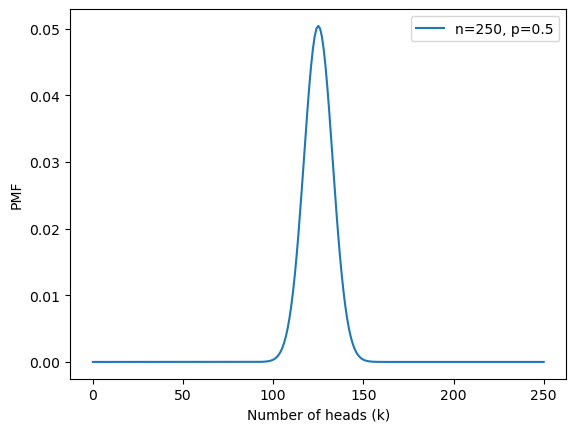

In [22]:
pmf_k = make_binomial(n=250,p=0.5)
import matplotlib.pyplot as plt

plt.plot(np.arange(251),pmf_k,label='n=250, p=0.5')
plt.xlabel('Number of heads (k)')
plt.ylabel('PMF')

plt.legend()
plt.show()

In [23]:
# most likely quantity in this distribution is 125
pmf_k.max_prob()

125

In [24]:
pmf_k[125]

0.050412213147309655

In [25]:
def prob_ge(pmf, threshold):
    ge = (pmf.qs >= threshold)
    total = pmf[ge].sum()
    return total

In [26]:
prob_ge(pmf_k,140)

0.03321057562002163

In [27]:
pmf_k.prob_ge(140) #one of the methods offered by pmf

0.03321057562002163

The reason for the difference is that the statistician includes all outcomes "as extreme as" 140, which includes outcomes less than or equal to 110.

In [28]:
pmf_k.prob_le(110) + pmf_k.prob_ge(140)

0.06642115124004327

Given $x$, the probability of landing heads up, we can use Bayes's theorem and the observed data to estimate x.

In [29]:
# priors creation
hypos = np.linspace(0,1,101)
prior = Pmf(1,hypos)
prior

,probs
0.00,1
0.01,1
0.02,1
0.03,1
0.04,1
...,...
0.96,1
0.97,1
0.98,1
0.99,1


In [30]:
likelihood = {
    "H": hypos,
    "T": 1-hypos
} #here we are calculating the proportion of heads (and tails)
dataset = 'H'*140 + 'T'*110

In [31]:
def update_euro(pmf,dataset):
    for data in dataset:
        pmf *= likelihood[data]
    pmf.normalize()

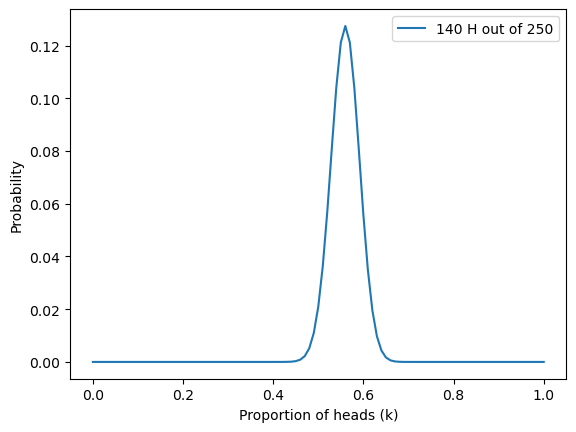

In [32]:
posterior = prior.copy()
update_euro(posterior,dataset)

plt.plot(posterior.qs,posterior.ps,label='140 H out of 250')
plt.xlabel('Proportion of heads (k)')
plt.ylabel('Probability')

plt.legend()
plt.show()

In [33]:
posterior.max_prob()

0.56

# Triangle & Uniform distribution

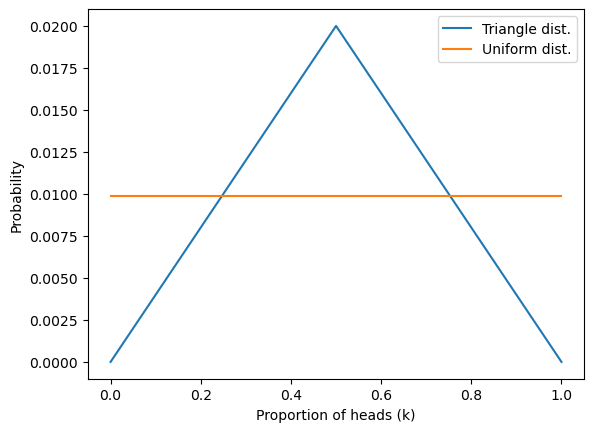

In [37]:
ramp_up = np.arange(50)
ramp_down = np.arange(50,-1,-1)

a = np.append(ramp_up,ramp_down)

triangle = Pmf(a,hypos,name="Triangle")
triangle.normalize()

uniform = Pmf(1,hypos,name='uniform')
uniform.normalize()

plt.plot(hypos,triangle,label='Triangle dist.')
plt.plot(hypos,uniform,label='Uniform dist.')
plt.xlabel('Proportion of heads (k)')
plt.ylabel('Probability')

plt.legend()
plt.show()

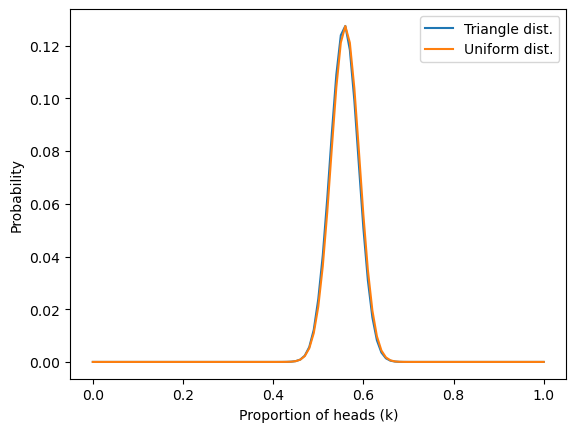

In [38]:
update_euro(uniform,dataset)
update_euro(triangle,dataset)
plt.plot(hypos,triangle,label='Triangle dist.')
plt.plot(hypos,uniform,label='Uniform dist.')
plt.xlabel('Proportion of heads (k)')
plt.ylabel('Probability')
plt.legend()
plt.show()

As we can see, even starting with different priors, if we have enough data, we will converge on the same posterior distribution.

# The Binomial Likelihood Function

In [39]:
def update_binomial(pmf,data):
    k, n = data
    xs = pmf.qs
    likelihood = binom.pmf(k,n,xs)
    pmf *= likelihood
    pmf.normalize()

In [40]:
uniform2 = Pmf(1,hypos,name="uniform2")
data = 140,250
update_binomial(uniform2,data)
np.allclose(uniform2,uniform) # results are really close, but this way it's far more efficient

True